Import the neccessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Data Loading

In [61]:
try:
    df = pd.read_csv("spam.csv",encoding="latin-1")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'spam.csv' was not found. Please ensure the file is in same directory")
    exit()
df

Data loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [62]:
import pandas as pd
import io

# Define the file content ID for the uploaded spam.csv
# In a real environment, you would use the actual file path.
FILE_ID = "spam.csv"

# In this environment, we use the content ID to read the file directly.
try:
    # 1. Load the data using the file content ID
    with open(FILE_ID, encoding='latin1') as f:
        df = pd.read_csv(f)
    print(f"Original DataFrame shape: {df.shape}")
    print(f"Original columns: {list(df.columns)}\n")

    # 2. Identify columns that start with 'Unnamed:'
    # These are typically generated by trailing commas in the CSV rows.
    columns_to_keep = [col for col in df.columns if not col.startswith('Unnamed:')]

    # 3. Create the new DataFrame with only the desired columns
    df_cleaned = df[columns_to_keep]

    # 4. Display the results
    print("--- Cleaned DataFrame ---")
    print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
    print(f"Cleaned columns: {list(df_cleaned.columns)}")
    print("\nFirst 5 rows of cleaned data:")
    # Rename the columns for clarity (v1 is 'label', v2 is 'message')
    df_cleaned.columns = ['label', 'message']
    print(df_cleaned.head())

except Exception as e:
    print(f"An error occurred: {e}")


Original DataFrame shape: (5572, 5)
Original columns: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

--- Cleaned DataFrame ---
Cleaned DataFrame shape: (5572, 2)
Cleaned columns: ['v1', 'v2']

First 5 rows of cleaned data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Data Preprocessing

In [63]:
# Rename the columns for clarity and consistency
df = df.rename(columns={
    "v1": "label",
    "v2": "message"
})

'''# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

# Drop dupliacted rows
df = df.drop_duplicates(inplace=True)

# Check for duplicated rows agains
df_duplicated = df.duplicated().sum()
print("Duplicated Rows after removing them")
print(df_duplicated)'''

# Initialize LabelEncoder to convert categorical text labels to numerical values
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

Feature Engineering

In [64]:
# Define the features matrix (X) and the target variable (Y)
X = df["message"]
y = df["label_encoded"]

Data Splitting

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Visualization before traning

Visualization before training 


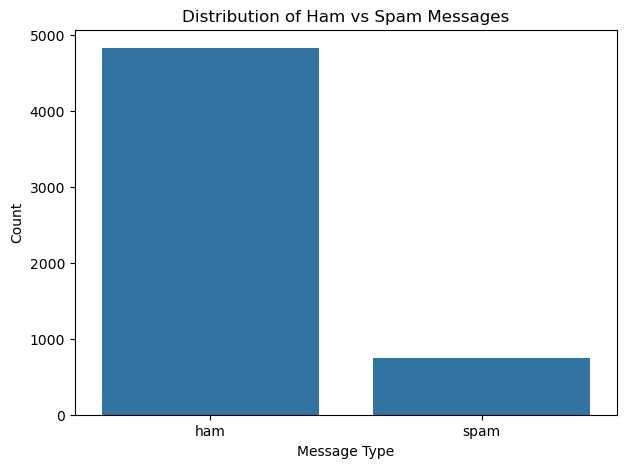

In [66]:
print("Visualization before training ")
plt.figure(figsize=(7,5))
# Use Seaborn to create a count plot for the 'label' column
sns.countplot(x="label",data=df)
plt.title("Distribution of Ham vs Spam Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

Text Vectorization

In [67]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
# Only transform the test data using the vocabulary learned from the training data
X_test_vec = tfidf_vectorizer.transform(X_test)

Model Training and Comaparison

In [68]:
# Dictionary of models to evaluate
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000,solver="liblinear",random_state=42),
    "Support Vector Machine (SVC)": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200,random_state=42)
}

results = {}
best_model = None
best_accuracy = 0.0
best_model_name = ""



print("Model Training and Evaluation")

# Loop through each model in the dictionary
for name, model in models.items():
    print(f"Training {name}...")
    # Train the model using the vectorized training data
    model.fit(X_train_vec,y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_vec)

    # Calculate the accuarcy of the model
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy

    # Print the detailed classification report 
    print(f" {name} Accuracy: {accuracy:.4f}")

    # Keep track of the best performing model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"Conclusion: The best model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

Model Training and Evaluation
Training Multinomial Naive Bayes...
 Multinomial Naive Bayes Accuracy: 0.9722
Training Logistic Regression...
 Logistic Regression Accuracy: 0.9704
Training Support Vector Machine (SVC)...
 Support Vector Machine (SVC) Accuracy: 0.9785
Training Random Forest...
 Random Forest Accuracy: 0.9758
Conclusion: The best model is Support Vector Machine (SVC) with an accuracy of 0.9785


Visualization after training

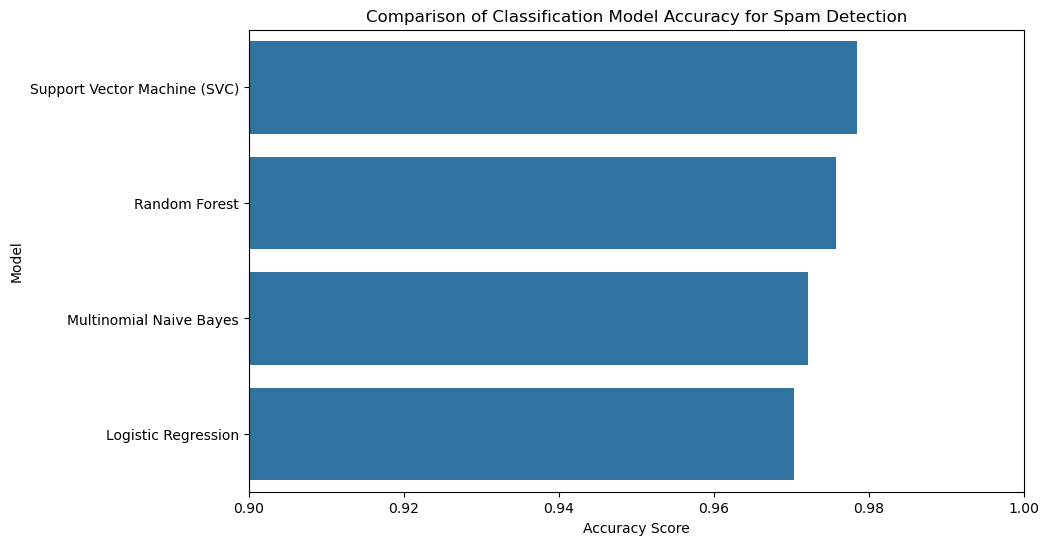

In [69]:
# Convert results dictionary to a DataFrame for easy plotting
results_df = pd.DataFrame(results.items(),columns=["Model","Accuracy"])
results_df = results_df.sort_values(by="Accuracy",ascending=False)

plt.figure(figsize=(10,6))
# Create a bar plot comapring the accuarcy of all trained models
sns.barplot(x="Accuracy",y="Model",data=results_df)
plt.title("Comparison of Classification Model Accuracy for Spam Detection")
plt.xlim(0.9,1.0)
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.show()

Interactive Input and Prediction

In [72]:
def predict_message(message,model,vectorizer,label_encoder):
    message_vec = vectorizer.transform([message])
    prediction_encoded = model.predict(message_vec)
    prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]
    


    return prediction_label


# Start the interactive loop using the best model found
print(f"Interactive Prediction using the best model: {best_model_name}")
print("Enter a message to check if it's 'ham' (legitimate) or 'spam'. Type 'exit' to quit")

while True:
    # Get the input from the user
    user_input = input("Your message:")

    # Check for the exit command
    if user_input.lower() == "exit":
        print("Exiting prediction tool. Good luck with your studies")
        break

    # Ensure a model was successfuly trained
    if best_model is None:
        print("Error: Model not trained")
        break

    # Get the prediction
    predicted_label = predict_message(user_input,best_model,tfidf_vectorizer,le)

    # Output the result
    if predicted_label == "spam":
        print(f"-> Prediction: [!!! SPAM !!!] - Our {best_model_name} model flagged this")
    else:
        print(f"-> Prediction: [HAM] - Our {best_model_name} model determined this is a legitmate message.")

Interactive Prediction using the best model: Support Vector Machine (SVC)
Enter a message to check if it's 'ham' (legitimate) or 'spam'. Type 'exit' to quit
-> Prediction: [HAM] - Our Support Vector Machine (SVC) model determined this is a legitmate message.
-> Prediction: [HAM] - Our Support Vector Machine (SVC) model determined this is a legitmate message.
-> Prediction: [HAM] - Our Support Vector Machine (SVC) model determined this is a legitmate message.
-> Prediction: [HAM] - Our Support Vector Machine (SVC) model determined this is a legitmate message.
-> Prediction: [HAM] - Our Support Vector Machine (SVC) model determined this is a legitmate message.
Exiting prediction tool. Good luck with your studies
